# Model Fitting -- Maximum Likelihood Method

In [28]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.stats import binom, chi2, norm
import matplotlib.pyplot as plt

## UK

### Read data

In [29]:
T_uk = pd.read_csv('seroprevalence_uk.csv', header=None)
T_uk.columns = ['Age','Positive','Population']
T_uk['Seroprevalence'] = T_uk['Positive']/T_uk['Population']

### Initial guess

In [30]:
theta_0 = 0.1

In [31]:
x = np.linspace(0,T_uk['Age'][len(T_uk['Age'])-1])
z = 1 - np.exp(-theta_0*x)

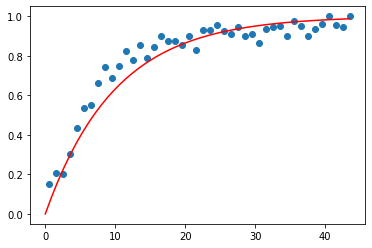

In [32]:
plt.scatter(T_uk['Age'],T_uk['Seroprevalence'])
plt.plot(x,z,'r');

### MLE

Suppose binomial distridution

In [33]:
custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))
result = minimize(custnloglf,theta_0);
theta_MLE = result.x
theta_MLE

C:\Users\dongm\AppData\Local\Temp/ipykernel_16476/1083208599.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))
C:\Users\dongm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dongm\AppData\Local\Temp/ipykernel_16476/1083208599.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))


array([0.11586433])

### Force of infection

In [34]:
theta_MLE_ci = []

chi2_fun = lambda x : chi2.cdf(x,1) - 0.95

chival_95 = fsolve(chi2_fun,2)

best_val = custnloglf(theta_MLE)
best_val

149.9754846876052

In [35]:
nln = lambda theta : custnloglf(theta) - (chival_95/2+best_val)

theta_MLE_ci.append(fsolve(nln,theta_MLE*0.9))
theta_MLE_ci.append(fsolve(nln,theta_MLE*1.1))
theta_MLE_ci = np.array(theta_MLE_ci)

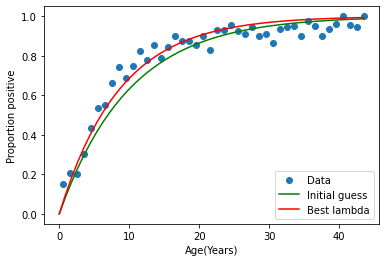

In [36]:
y = 1 - np.exp(-theta_MLE*x)
plt.scatter(T_uk['Age'],T_uk['Seroprevalence'],label='Data')
plt.plot(x,z,'g',label='Initial guess')
plt.plot(x,y,'r',label='Best lambda')
plt.xlabel('Age(Years)')
plt.ylabel('Proportion positive')
plt.legend();

### Average at infection

In [37]:
L = 60
A = 1/theta_MLE
R_0 = L/A
H = 1 - 1/R_0
print(A, R_0, H)

[8.63078361] [6.95186007] [0.85615361]


In [39]:
A_ci = 1/theta_MLE_ci
R_0_ci = L/A_ci
H_ci = 1 - 1/R_0_ci
print(A_ci)
print(R_0_ci)
print(H_ci)

[[9.01614956]
 [8.26411605]]
[[6.65472545]
 [7.26030463]]
[[0.84973084]
 [0.86226473]]
